In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
data = pd.read_csv("./titanic-passengers.csv",delimiter=';')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#we check the total of null values
n=data.isnull().sum().sum()
if(n==0):
    print("our data is ready to be used")
else:
    print("No! there are :",n,"total null values")
    #we check if there are any null values
    for col in data.columns:
        #if a column doesnt have any null values then there is no point processing it
        if(data[col].isnull().sum()>0):
            if(str(data.dtypes[col]) in ["int64","float64","int32","float32"]):
                #if our data numerical (is either float or int) 
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(data[col].mean(),inplace=True)
                print(col,"after",data[col].isnull().sum())
            elif (str(data.dtypes[col])=="object"):
                #if our data is categorical (is an object)
                a=data[col].mode()
                l=len(a)
                s=a[l-1]
                print(s)
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(s,inplace=True)
                print(col,"after",data[col].isnull().sum())
    print("our data should now be ready to be used.")            
        
    

No! there are : 866 total null values
Age before 177
Age after 0
G6
Cabin before 687
Cabin after 0
S
Embarked before 2
Embarked after 0
our data should now be ready to be used.


In [5]:
Title_Dictionary = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":   "Royalty",
"Don":"Royalty","Sir" :"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona":"Royalty","Mme":"Miss","Mlle":       "Miss",
"Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master":"Master"}
df=data.drop(['Name'], axis=1)
df['Title'] = pd.Series(data['Name'], index=df.index)
df['Title']=df['Title'].str.split(", ").map(lambda x:x[1]).str.split(".").map(lambda x:x[0]).map(Title_Dictionary)

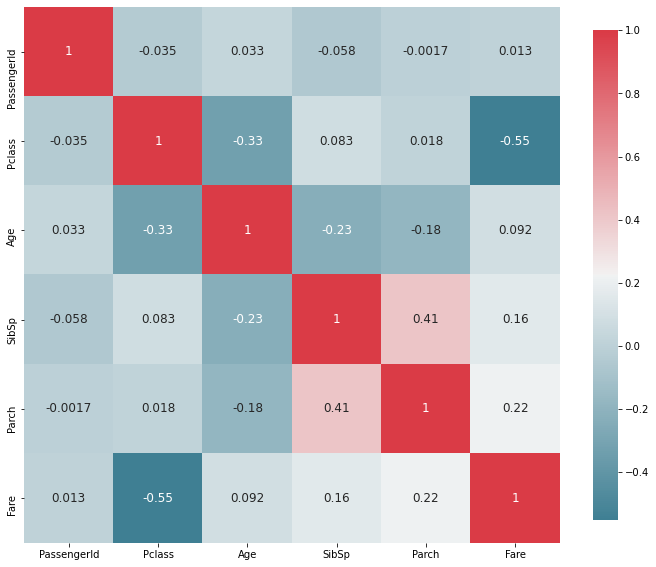

In [6]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })   

plot_correlation_map(df)

In [7]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df["Sex"]=df["Sex"].map({"male": 1, "female": 2})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,G6,S,Mrs
1,76,0,3,1,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,1,20.0,0,0,350050,7.8542,G6,S,Mrs
3,568,0,3,2,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


In [8]:
#features extraction
x = df[['Sex', 'Age','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
#the accuracy of our model is 81%

Accuracy=0.81


<AxesSubplot:xlabel='Age', ylabel='Survived'>

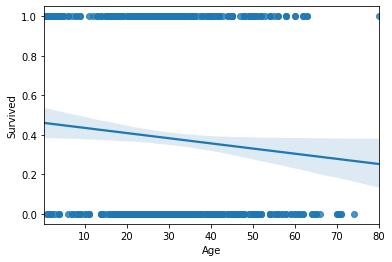

In [9]:
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

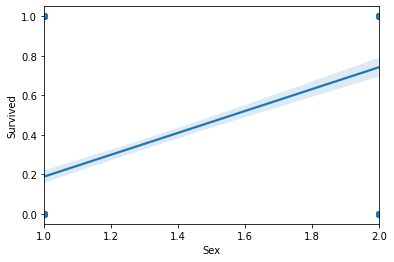

In [10]:
sns.regplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

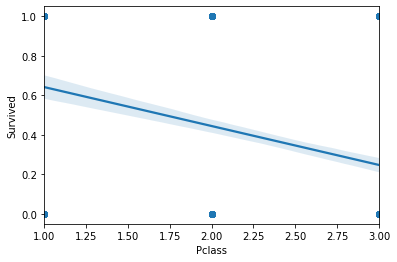

In [11]:
sns.regplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

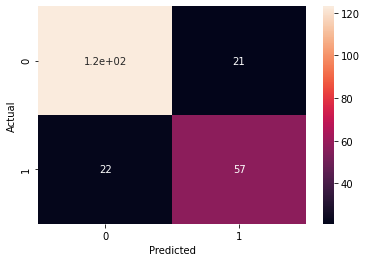

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       144
           1       0.73      0.72      0.73        79

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



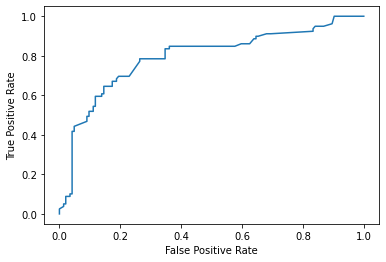

In [16]:
'''A receiver operating characteristic (ROC) curve is a graph representing the performance of a classification model for all 
classification thresholds. This curve plots the rate of true positives as a function of the rate of false positives:'''
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
#X, y = datasets.make_classification(random_state=0)
#X_train, X_test, y_train, y_test = model_selection.train_test_split(
#X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(x_train, y_train)
y_score = clf.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
auc=metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [17]:
'''AUC stands for "area under the ROC curve".
This value measures the entire two-dimensional area under the entire ROC curve (by integral calculations) from (0,0) to (1,1).'''
auc

0.7919303797468353